In [13]:
import pandas as pd


In [14]:
download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/" "data/master/college-majors/recent-grads.csv")


In [15]:
df = pd.read_csv(download_url)


In [16]:
type(df)


pandas.core.frame.DataFrame

In [17]:
pd.set_option("display.max.columns", None)


In [18]:
df.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Create Your First Pandas Plot


In [19]:
import matplotlib.pyplot as plt


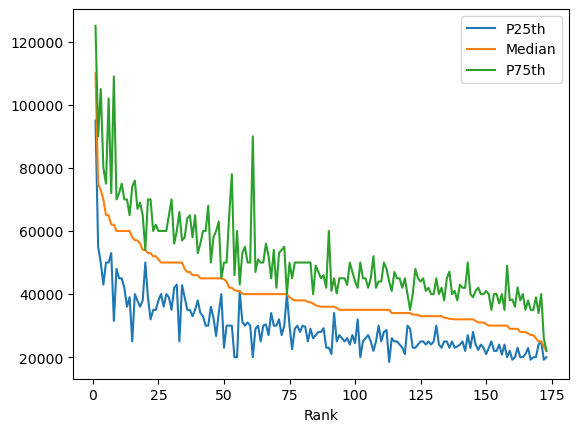

In [20]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()


.plot() has several optional parameters. Most notably, the kind parameter accepts eleven different string values and determines which kind of plot you’ll create:


.area()
.bar()
.barh()
.box()
.hexbin()
.hist()
.kde()
.density()
.line()
.pie()
.scatter()


In [21]:
import matplotlib.pyplot as pl


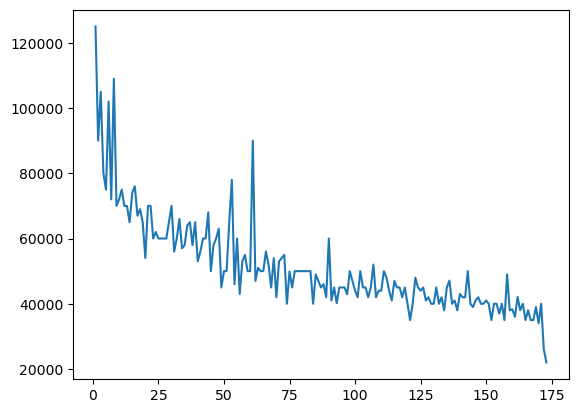

In [26]:
plt.plot(df["Rank"], df["P75th"])


<Axes: xlabel='Rank'>

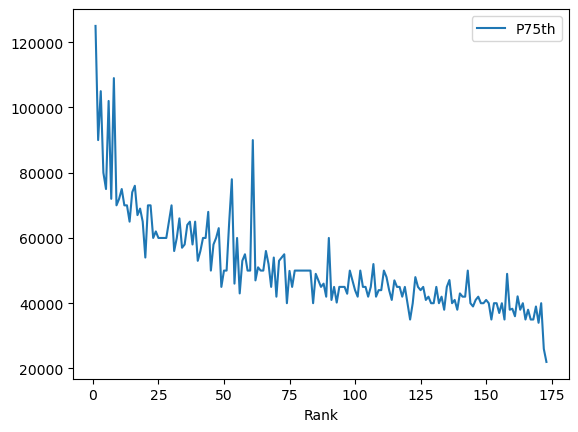

In [27]:
df.plot(x="Rank", y="P75th")


.plot() is a wrapper for pyplot.plot(), and the result is a graph identical to the one you produced with Matplotlib:


# Survey Your Data


In [29]:
median_column = df["Median"]


In [30]:
type(median_column)


pandas.core.series.Series

<Axes: ylabel='Frequency'>

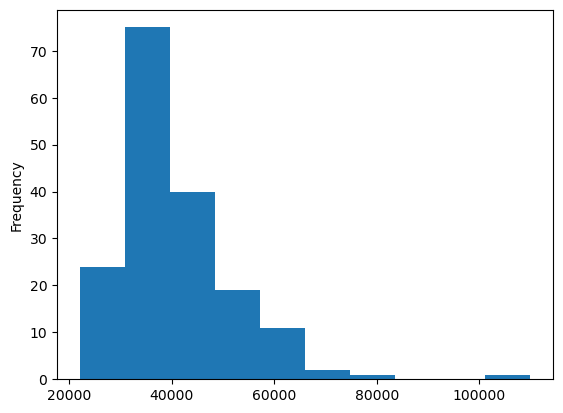

In [32]:
median_column.plot(kind="hist")


The histogram shows the data grouped into ten bins ranging from $20,000 to $120,000, and each bin has a width of $10,000. The histogram has a different shape than the normal distribution, which has a symmetric bell shape with a peak in the middle.


# Outliers


In [34]:
top_5 = df.sort_values(by="Median", ascending=False).head()


<Axes: xlabel='Major'>

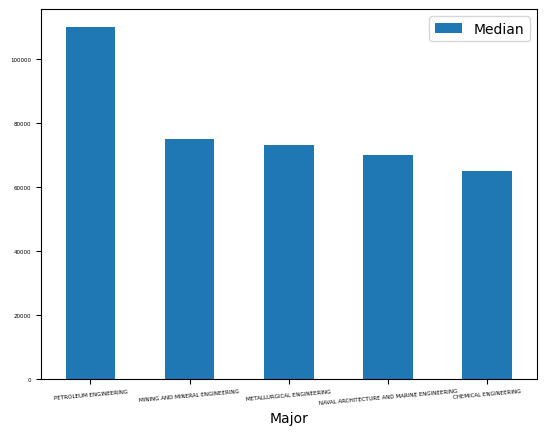

In [35]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)


This plot shows that the median salary of petroleum engineering majors is more than $20,000 higher than the rest. The earnings for the second- through fourth-place majors are relatively close to one another.

If you have a data point with a much higher or lower value than the rest, then you’ll probably want to investigate a bit further. For example, you can look at the columns that contain related data.

Let’s investigate all majors whose median salary is above $60,000. First, you need to filter these majors with the mask df[df["Median"] > 60000]. Then you can create another bar plot showing all three earnings columns:


In [36]:
top_medians = df[df["Median"] > 60000].sort_values("Median")


<Axes: xlabel='Major'>

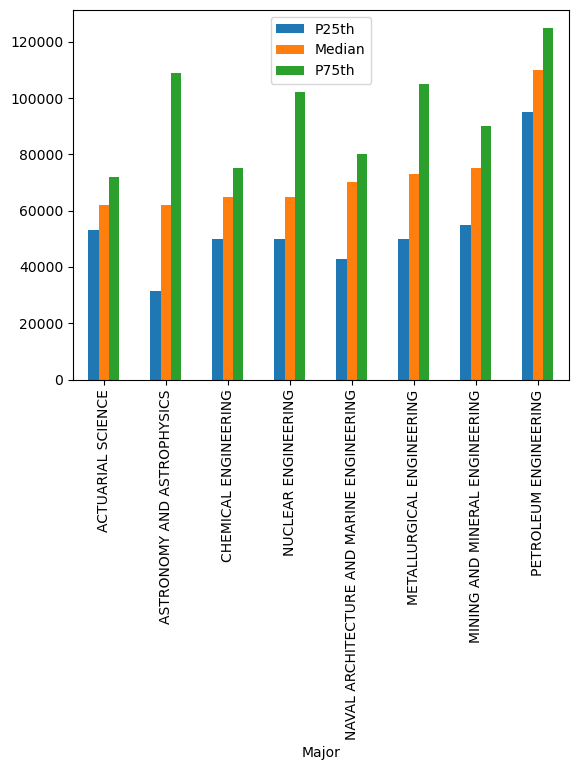

In [38]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")


# Check for Correlation


<Axes: xlabel='Median', ylabel='Unemployment_rate'>

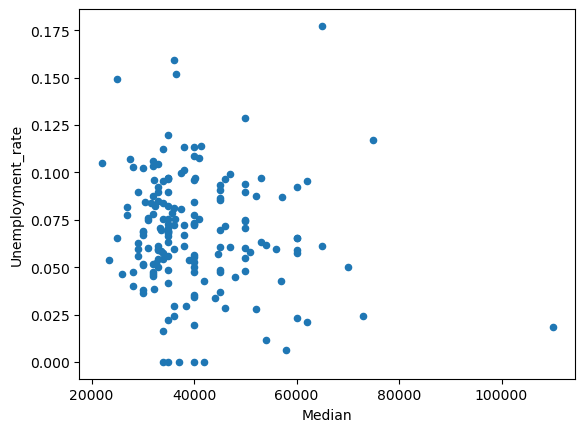

In [40]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")


A quick glance at this figure shows that there’s no significant correlation between the earnings and unemployment rate.

While a scatter plot is an excellent tool for getting a first impression about possible correlation, it certainly isn’t definitive proof of a connection. For an overview of the correlations between different columns, you can use .corr(). If you suspect a correlation between two values, then you have several tools at your disposal to verify your hunch and measure how strong the correlation is.

Keep in mind, though, that even if a correlation exists between two values, it still doesn’t mean that a change in one would result in a change in the other. In other words, correlation does not imply causation.


# Analyze Categorical Data


In [41]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()


In [42]:
cat_totals


Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64